In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Restaurant_Reviews.tsv' ,sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

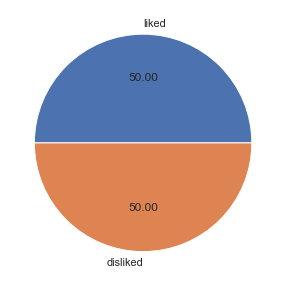

In [73]:
plt.figure(figsize=(15,5))
plt.pie(df['Liked'].value_counts() ,labels =['liked' ,'disliked'] ,autopct = '%0.2f')
plt.show()

## No of character in sms

In [74]:
len(df['Review'][0])

24

In [75]:
df['num_character'] =df['Review'].str.len()

In [76]:
df.head()

,Review,Liked,num_character,num_words,no_of_sentences,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


In [77]:
df['num_character'][df['num_character'].isnull()]

Series([], Name: num_character, dtype: int64)

In [78]:
df.isnull().sum()

Review              0
Liked               0
num_character       0
num_words           0
no_of_sentences     0
transformed_text    0
dtype: int64

In [79]:
df.shape

(1000, 6)

## No of words

In [80]:
import nltk

In [81]:
nltk.word_tokenize(df['Review'][0])

['Wow', '...', 'Loved', 'this', 'place', '.']

In [82]:
df['num_words'] = df['Review'].apply(lambda x :len(nltk.word_tokenize(x)))

In [83]:
df.head()

,Review,Liked,num_character,num_words,no_of_sentences,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


In [84]:
df.isnull().sum()

Review              0
Liked               0
num_character       0
num_words           0
no_of_sentences     0
transformed_text    0
dtype: int64

In [85]:
df.describe()

,Liked,num_character,num_words,no_of_sentences
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.50000,58.315000,12.684000,1.039000
std,0.50025,32.360052,6.735838,0.193692
min,0.00000,11.000000,3.000000,1.000000
25%,0.00000,33.000000,7.000000,1.000000
50%,0.50000,51.000000,11.000000,1.000000
75%,1.00000,80.000000,17.000000,1.000000
max,1.00000,149.000000,34.000000,2.000000


## No of sentences

In [86]:
df['no_of_sentences'] = df['Review'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [87]:
df.head()

,Review,Liked,num_character,num_words,no_of_sentences,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


In [88]:
df[df['Liked']==1][['num_character' ,'num_words' ,'no_of_sentences']].describe()

,num_character,num_words,no_of_sentences
count,500.000000,500.000000,500.00000
mean,55.880000,12.042000,1.04800
std,30.219464,6.282609,0.21398
min,11.000000,3.000000,1.00000
25%,32.750000,7.000000,1.00000
50%,49.500000,11.000000,1.00000
75%,73.250000,16.000000,1.00000
max,148.000000,33.000000,2.00000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

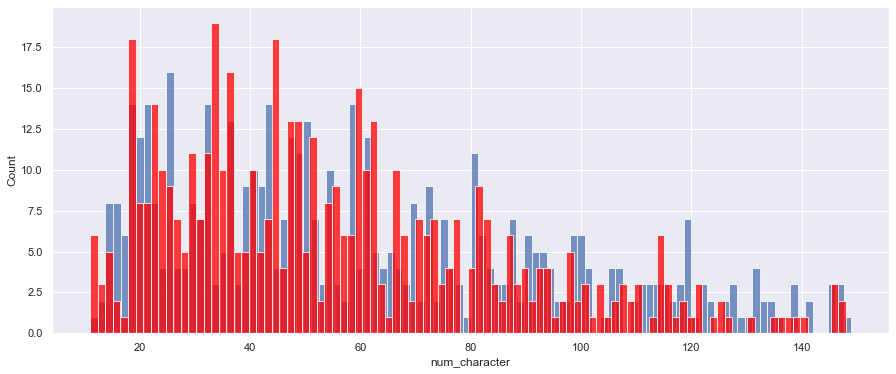

In [89]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['Liked']==0]['num_character'] ,bins=100)
sns.histplot(df[df['Liked']==1]['num_character'],bins=100,color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

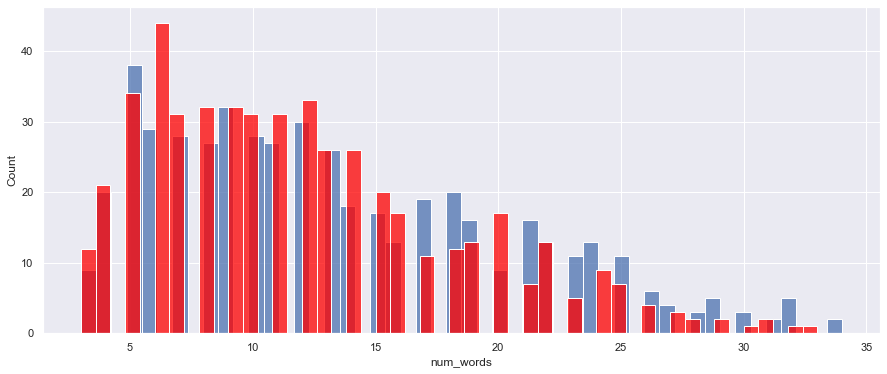

In [90]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['Liked']==0]['num_words'] ,bins=50)
sns.histplot(df[df['Liked']==1]['num_words'],bins=50,color='red')

<AxesSubplot:xlabel='no_of_sentences', ylabel='Count'>

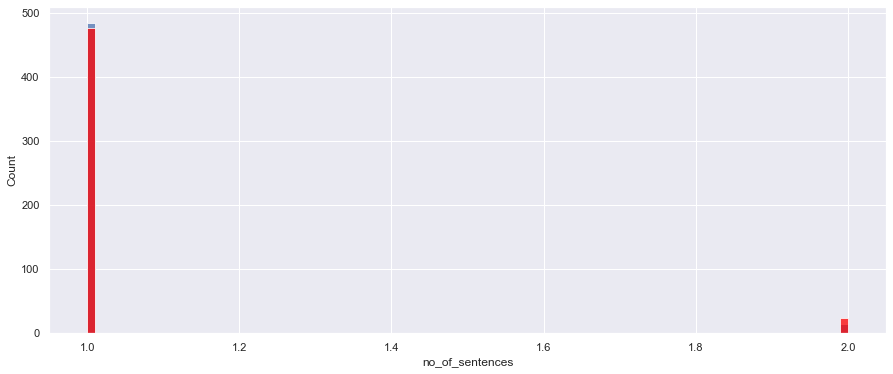

In [91]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['Liked']==0]['no_of_sentences'] ,bins=100)
sns.histplot(df[df['Liked']==1]['no_of_sentences'],bins=100,color='red')

In [92]:
df

,Review,Liked,num_character,num_words,no_of_sentences,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,13,1,think food flavor textur lack
996,Appetite instantly gone.,0,24,4,1,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,50,11,1,overal impress would go back
998,"The whole experience was underwhelming, and I ...",0,91,19,1,whole experi underwhelm think go ninja sushi n...


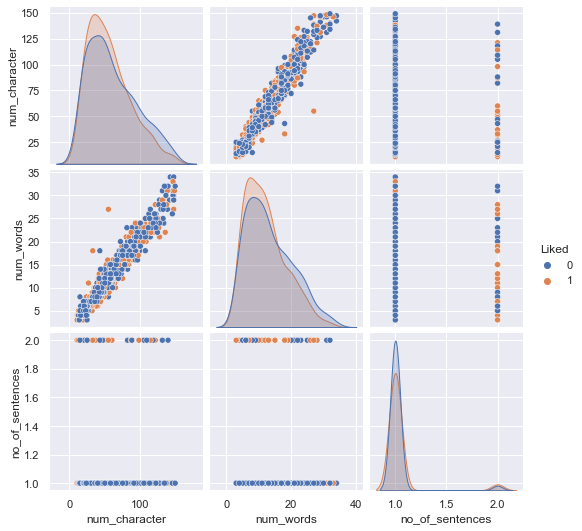

In [93]:
sns.pairplot(df,hue='Liked')
plt.show()

## Data Preprocessing

In [94]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [95]:
df['transformed_text']=df['Review'].apply(transform_text)

In [96]:
df.head()

,Review,Liked,num_character,num_words,no_of_sentences,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


In [97]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [98]:
Liked_wordcl = wc.generate(df[df['Liked']==1]['transformed_text'].str.cat(sep=" "))

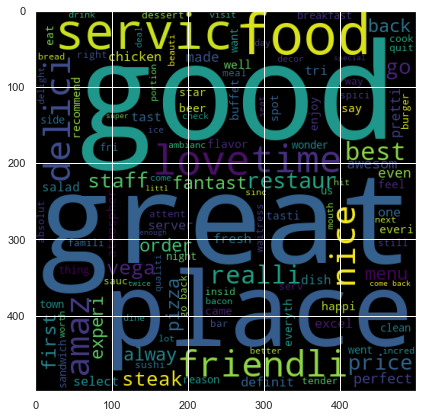

In [99]:
plt.figure(figsize=(25,7))
plt.imshow(Liked_wordcl)
plt.show()

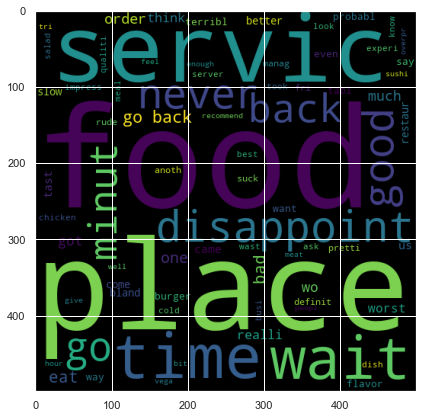

In [100]:
Disliked_wordcl = wc.generate(df[df['Liked']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(25,7))
plt.imshow(Disliked_wordcl)
plt.show()

In [103]:
text_list=df[df['Liked']==1]['transformed_text'].tolist()
liked_review=[]

for msg in text_list:
    for word in msg.split():
        liked_review.append(word)

In [104]:
len(df[df['Liked']==1]['transformed_text'].tolist())

500

In [105]:
len(liked_review)

2680

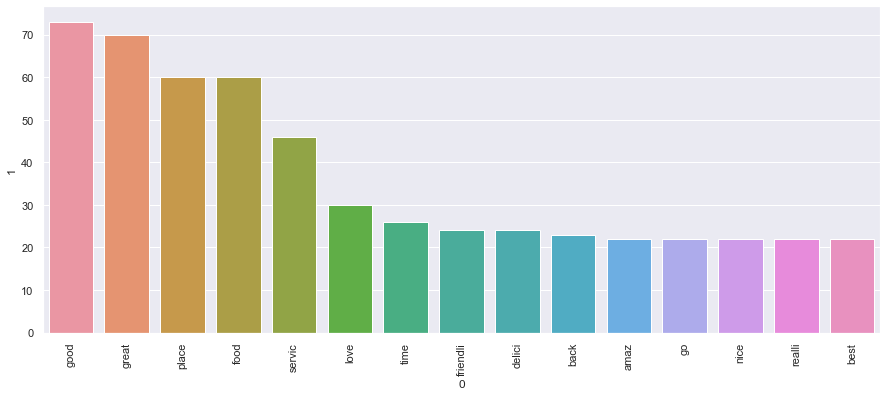

In [106]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(liked_review).most_common(15))[0],pd.DataFrame(Counter(liked_review).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [116]:
text_list=df[df['Liked']==0]['transformed_text'].tolist()
Diliked_review=[]

for msg in text_list:
    for word in msg.split():
        Diliked_review.append(word)

In [117]:
len(df[df['Liked']==0]['transformed_text'].tolist())

500

In [118]:
len(Diliked_review)

2838

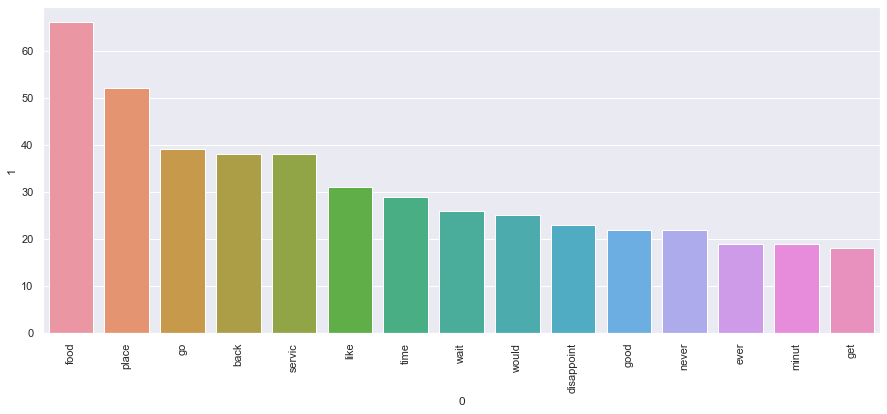

In [119]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(Diliked_review).most_common(15))[0],pd.DataFrame(Counter(Diliked_review).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [122]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [124]:
X =cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
X.shape

(1000, 1558)

In [128]:
y =df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
# false positive should be reduced

In [131]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [132]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print("\n",confusion_matrix(y_test , y_pred1))
print("\n",precision_score(y_test , y_pred1))

0.725

 [[62 46]
 [ 9 83]]

 0.6434108527131783


In [133]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print("\n",confusion_matrix(y_test , y_pred2))
print("\n",precision_score(y_test , y_pred2))

0.825

 [[84 24]
 [11 81]]

 0.7714285714285715


In [134]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print("\n",confusion_matrix(y_test , y_pred3))
print("\n",precision_score(y_test , y_pred3))

0.805

 [[79 29]
 [10 82]]

 0.7387387387387387


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [139]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.715, 0.7011494252873564)

In [140]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.715
Precision -  0.7011494252873564
For  KN
Accuracy -  0.69
Precision -  0.7083333333333334
For  NB
Accuracy -  0.825
Precision -  0.7714285714285715
For  DT
Accuracy -  0.69
Precision -  0.8125
For  LR
Accuracy -  0.785
Precision -  0.7951807228915663
For  RF
Accuracy -  0.805
Precision -  0.8117647058823529
For  AdaBoost
Accuracy -  0.8
Precision -  0.8333333333333334
For  BgC
Accuracy -  0.77
Precision -  0.7395833333333334
For  ETC
Accuracy -  0.76
Precision -  0.7894736842105263
For  GBDT
Accuracy -  0.795
Precision -  0.8591549295774648
For  xgb
Accuracy -  0.78
Precision -  0.7790697674418605


In [141]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [142]:
performance_df1

,Algorithm,Accuracy,Precision
9,GBDT,0.795,0.859155
6,AdaBoost,0.800,0.833333
3,DT,0.690,0.812500
5,RF,0.805,0.811765
4,LR,0.785,0.795181
8,ETC,0.760,0.789474
10,xgb,0.780,0.779070
2,NB,0.825,0.771429
7,BgC,0.770,0.739583
1,KN,0.690,0.708333


In [147]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [152]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [149]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [150]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.79
Precision 0.7717391304347826


In [153]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [154]:
from sklearn.ensemble import StackingClassifier

In [155]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [156]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.82
Precision 0.8181818181818182
